In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df1 = pd.read_csv("Desktop\\DS Practice\\Bengaluru House Prices\\bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type', 'availability'], axis = 'columns')

In [9]:
df2.head()

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df2.shape

(13320, 7)

In [11]:
df2.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [19]:
df3 = df2.dropna(subset = ["location", "size"])

In [20]:
df3.isnull().sum()

location         0
size             0
society       5499
total_sqft       0
bath            57
balcony        593
price            0
dtype: int64

In [21]:
df3["society"].fillna(value = "No_society", inplace = True)
df3.isnull().sum()

location        0
size            0
society         0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [22]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-23-33d3d36c21fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))


,location,size,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,No_society,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,No_society,1200,2.0,1.0,51.00,2


In [24]:
df3.drop(["size"], axis="columns", inplace = True)

C:\Users\SAK\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df3.head()

,location,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Uttarahalli,No_society,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Kothanur,No_society,1200,2.0,1.0,51.00,2


In [26]:
df3.isnull().sum()

location        0
society         0
total_sqft      0
bath           57
balcony       593
price           0
bhk             0
dtype: int64

In [33]:
test_df = df3

In [74]:
test_df["bath"].fillna(value = df3["bath"].mean(), inplace = True)

In [96]:
test_df2 = test_df["bath"].round(decimals = 0)

In [93]:
test_df2.head()

0    2.0
1    5.0
2    2.0
3    3.0
4    2.0
Name: bath, dtype: float64

In [89]:
test_df["bath"].unique()

array([ 2.        ,  5.        ,  3.        ,  4.        ,  6.        ,
        1.        ,  9.        ,  2.69258644,  8.        ,  7.        ,
       11.        , 10.        , 14.        , 27.        , 12.        ,
       16.        , 40.        , 15.        , 13.        , 18.        ])

In [53]:
test_df.isnull().sum()

location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [54]:
df3 = test_df

In [55]:
df3.isnull().sum()

location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [56]:
test_df["balcony"].fillna(value = round(df3["balcony"].mean()), inplace = True)

In [57]:
test_df.isnull().sum()

location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [58]:
df3 = test_df

In [59]:
df3.isnull().sum()

location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [60]:
df3["balcony"].unique()

array([1.        , 3.        , 1.58434304, 2.        , 0.        ])

In [97]:
df3[df3.bhk>20]

,location,society,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,No_society,8000,27.0,0.0,230.0,27
4684,Munnekollal,No_society,2400,40.0,0.0,660.0,43


In [99]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [102]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,society,total_sqft,bath,balcony,price,bhk
30,Yelahanka,LedorSa,2100 - 2850,4.000000,0.000000,186.000,4
56,Devanahalli,BrereAt,3010 - 3410,2.692586,1.584343,192.000,4
81,Hennur Road,Gollela,2957 - 3450,2.692586,1.584343,224.500,4
122,Hebbal,SNontle,3067 - 8156,4.000000,0.000000,477.000,4
137,8th Phase JP Nagar,Vaarech,1042 - 1105,2.000000,0.000000,54.005,2
165,Sarjapur,Kinuerg,1145 - 1340,2.000000,0.000000,43.490,2
188,KR Puram,MCvarar,1015 - 1540,2.000000,0.000000,56.800,2
224,Devanahalli,Jurdsig,1520 - 1740,2.692586,1.584343,74.820,3
410,Kengeri,No_society,34.46Sq. Meter,1.000000,0.000000,18.500,1
549,Hennur Road,Shxorm,1195 - 1440,2.000000,0.000000,63.770,2


In [106]:
def convert_sqft(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [107]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft)
df4.head()

,location,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,No_society,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Kothanur,No_society,1200.0,2.0,1.0,51.00,2


In [108]:
df4.loc[30]

location      Yelahanka
society         LedorSa
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

In [109]:
df4.head()

,location,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,No_society,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Kothanur,No_society,1200.0,2.0,1.0,51.00,2


In [110]:
df4.isnull().sum()

location       0
society        0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [111]:
df5 = df4.dropna(subset = ["total_sqft"])

In [112]:
df5.isnull().sum()

location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [114]:
df6 = df5.copy()

In [115]:
df6.head()

,location,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,No_society,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Kothanur,No_society,1200.0,2.0,1.0,51.00,2


In [116]:
df6["price_per_sqft"] = df6["price"]*100000/df6["total_sqft"]
df6.head()

,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,No_society,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,No_society,1200.0,2.0,1.0,51.00,2,4250.000000


In [118]:
len(df6.location.unique())

1298

In [120]:
df6.location = df6.location.apply(lambda x: x.strip())

location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [121]:
len(location_stats[location_stats<=10])

1047

In [123]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
B Narayanapura          9
Banagiri Nagar          9
Kaverappa Layout        9
Ejipura                 9
Chennammana Kere        9
                       ..
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
Kodanda Reddy Layout    1
1 Annasandrapalya       1
Name: location, Length: 1033, dtype: int64

In [124]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

255

In [127]:
df6[df6.total_sqft/df6.bhk < 300].shape

(744, 8)

In [128]:
df7 = df6[~(df6.total_sqft/df6.bhk < 300)]

In [129]:
df7.shape

(12513, 8)

In [131]:
df6.shape

(13257, 8)

In [132]:
df7.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [133]:
df7.loc[df7.price_per_sqft < 300]

,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
1894,other,No_society,52272.0,2.0,1.0,140.0,3,267.829813


In [135]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft < (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df8 = remove_pps_outlier(df7)
df8.shape

(10267, 8)

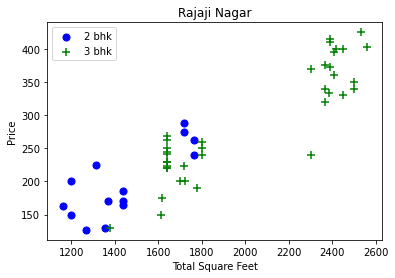

In [137]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    # matplotlib.rcParams['fugure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '+', label = '3 bhk', s = 50)
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df8, 'Rajaji Nagar')

In [139]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_Df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df9 = remove_bhk_outlier(df8)
df9.shape

(10266, 8)

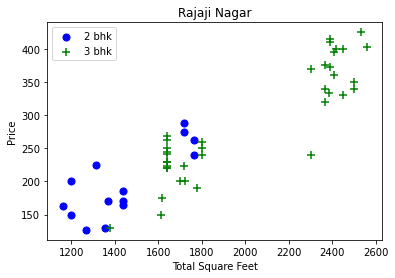

In [140]:
plot_scatter_chart(df9, 'Rajaji Nagar')

In [143]:
df9[df9.bath>df9.bhk+2].head()

,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,BTM 1st Stage,Srvasks,3300.0,14.0,1.584343,500.0,9,15151.515152
1650,Chikkabanavar,No_society,2460.0,7.0,2.000000,80.0,4,3252.032520
5334,Nagasandra,No_society,7000.0,8.0,1.584343,450.0,4,6428.571429
6829,Thanisandra,Soitya,1806.0,6.0,2.000000,116.0,3,6423.034330
8520,other,Prowshi,11338.0,9.0,1.000000,1000.0,6,8819.897689


In [145]:
df10 = df9[df9.bath < df9.bhk+2]
df10.shape

(10172, 8)

In [150]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,No_society,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,No_society,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,No_society,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,No_society,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df11.drop(['location', 'society'], axis = 'columns', inplace = True)
# df11.drop('society', axis = 'columns', inplace = True)
df11.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df11.shape

(10172, 260)

In [168]:
x = df11.drop('price', axis = 'columns')
x.head()

,total_sqft,bath,balcony,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [171]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.9233463965455725

In [172]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([ 9.40438381e-01, -9.37639502e+13,  9.33475775e-01,  9.36730712e-01,
        9.10672394e-01])

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter'  : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x, y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params'  : gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,-1.875279e+13,{'normalize': False}
1,lasso,9.157524e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,9.716035e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [184]:
def predict_price(location, sqft, bath, bhk, balcony):
    loc_index = np.where(x.columns == location)[0][0]
    
    h= np.zeros(len(x.columns))
    h[0] = sqft
    h[1] = bath
    h[2] = bhk
    h[3] = balcony
    if loc_index >= 0:
        h[loc_index] = 1
    
    return lr_clf.predict([h])[0]

In [191]:
predict_price('1st Phase JP Nagar', 1000, 3, 2, 0)

-40.63505300473943

In [189]:
predict_price('Indira Nagar', 1000, 2, 2, 2)

-27.85463192458856